In [16]:
# Load Libraries

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
from keras.models import load_model
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt                 

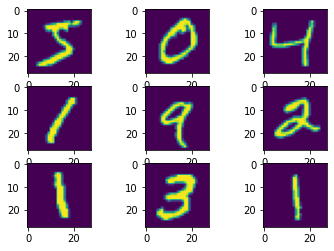

In [17]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(x_train[i])
plt.show()

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
y_test.shape

(10000,)

In [20]:
# Preprocessing data
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32')
x_train = x_train/ 255    #scale pixel into (0-1)

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32')
x_test = x_test/ 255     #scale pixel into (0-1)

# one-hot output || 1: pos || 0:neg
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [22]:
# Model
# Create model
model = Sequential()

# Build Layer
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                  

In [24]:
# Create optimize
sgd = SGD(lr = 0.1, momentum = 0.95)
model.compile(loss = 'binary_crossentropy',optimizer = sgd, metrics = ['accuracy'])

In [25]:
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 78s 165ms/step - loss: 0.0953 - accuracy: 0.8213 - val_loss: 0.0186 - val_accuracy: 0.9729
Epoch 2/10
469/469 [==============================] - 80s 170ms/step - loss: 0.0144 - accuracy: 0.9802 - val_loss: 0.0114 - val_accuracy: 0.9834
Epoch 3/10
469/469 [==============================] - 81s 173ms/step - loss: 0.0097 - accuracy: 0.9868 - val_loss: 0.0084 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 83s 177ms/step - loss: 0.0074 - accuracy: 0.9902 - val_loss: 0.0072 - val_accuracy: 0.9896
Epoch 5/10
469/469 [==============================] - 82s 174ms/step - loss: 0.0056 - accuracy: 0.9931 - val_loss: 0.0064 - val_accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 82s 174ms/step - loss: 0.0045 - accuracy: 0.9946 - val_loss: 0.0074 - val_accuracy: 0.9889
Epoch 7/10
469/469 [==============================] - 80s 172ms/step - loss: 0.0036 - accuracy: 0.9961 - val_loss: 0.0059 - val_ac

Position of number:200
1/1 [==============================] - 0s 22ms/step


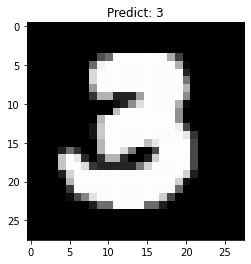

In [35]:
# Predict
Label = ['0', '1', '2', '3','4', '5', '6', '7', '8', '9']
num = int(input('Position of number:'))
num_predict = np.argmax(model.predict(x_test[num].reshape((-1,28,28,1))))
plt.title("Predict: " + str(Label[num_predict]))
plt.imshow(x_test[num],cmap=plt.get_cmap('gray'))